# UC San Diego: Neural Data Science
## Project Title: NLP to Discover Relationships Between Brain Functions and Brain Lobes

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

- Mingze Xu
- Sizhe Fan
- Nihal Suppala

# Overview

We used LISC to collect published literature that did research about various brain functions from Pubmed. We then checked if any of these brain functions were correlated to any of four lobes in the scanned literature. We conducted NLP to cluster these brain functions into groups that had a similar amount of mention in the literature of each of the four lobes. This was done in order to reveal connections between these brain functions, and how the area that these processes are performed in the brain may determine their relationships.


# Research Question
 - How do four lobes of the brain share responsibility for various brain functions, and how does this relationship influence the interconnection of these functions?

# Background & Prior Work

Within the Cognitive Science major, we have taken many neuroscience courses, and we learned the distinct functions and features of the four lobes in the human brain. For example, we have learned that the frontal lobe is mainly responsible for higher cognitive functions as stated in the article Introspection, attention or awareness? The role of the frontal lobe in binocular rivalry, “in the mechanisms of conscious vision might involve typical higher-level frontal lobe functions such as attention, motivation and decision-making. [1]” On the other hand, there is evidence showing that the parietal lobe is also involved in attention. In other words, regarding attention, both the frontal lobe and the parietal lobe play an important role, and that is something we did not acquire from the neuroscience courses. It has been known that even though many brain functions are highly connected with one lobe, brain functions actually occur in the entirety of the brain [2]. 

With the advent of many new computer-based methods and machine learning processes, there is a very large amount of prior research and literature that can be scrubbed through, at a very fast pace, to allow for further scientific progress and understanding. Text mining is one of these methods that rapidly create different ideas. Rajman, Martin and Besancon have researched how text mining can reveal hypotheses that would not be so obvious in the lifecycle of a traditional scientific experiment [3]. We will use a dataset consisting of a large amount of various brain functions, though we plan to use 100 of them, that are associated with different parts of the brain. With use of text mining, of research literature on Pubmed, and other useful methods, like natural language processing and clustering, we can reveal connections between brain functions and how the four lobes of the brain are interconnected with these processes.


[1] Zaretskaya N and Narinyan M (2014) Introspection, attention or awareness? The role of the frontal lobe in binocular rivalry. Front. Hum. Neurosci. 8:527. doi: 10.3389/fnhum.2014.00527

[2] Rosenberg, Monica D., et al. "A neuromarker of sustained attention from whole-brain functional connectivity." Nature neuroscience 19.1 (2016): 165-171.

[3] Rajman, Martin, and Romaric Besançon. "Text mining: natural language techniques and text mining applications." Data mining and reverse engineering. Springer, Boston, MA, 1998. 50-64.

# Hypothesis

- Each brain function is carried out in each of the four lobes of the brain, and similarities of responsibility of the lobes they centered in lead to the interconnection of multiple brain functions.
- In Rosenberg's research, she states that even though brain functions may be highly correlated to some parts of the brain, they are carried out throughout the brain. Our hypothesis is influenced by this argument.

# Datasets


- **Dataset Name:** Pubmed
- Link to the dataset: https://pubmed.ncbi.nlm.nih.gov/
- Number of observations: may variate during analysis
- Description: All the articles of the terms are from the webiste Pubmed, and there are millions of articles on the webiste. We are only using part of the articles, so the number of observation varies depending on our need.

- **Dataset Name:** neural_function_terms.csv (From Professor Bardley Voytek)
- Link to the dataset: https://drive.google.com/file/d/12_916Cggh68P9Bxq_vzT0HXjC8aH0XMX/view?usp=sharing
- Number of observations: 373 functinal terms out of 1299 in total (may include duplications)
- Description: long list of neural-related terms (funtional, chemical, etc)

- **Dataset Name:** terms.txt
- Link to the dataset: https://drive.google.com/file/d/1TAHCuB_r5PdAwfoaSg71Qp7zhvJ0TAwn/view?usp=sharing
- Number of observations: 26 terms
- Description: all terms that have 300+ related articles

- **Dataset Name:** term_text_small.csv
- Link to the dataset: https://drive.google.com/file/d/1--mleq5P2gXblO43deidRnfLWk3QZDIk/view?usp=sharing
- Number of observations: 26
- Description: each term and its related abstract text

- **Dataset Name:** term_text_large.csv
- Link to the dataset: https://drive.google.com/file/d/10EOvULF2dQ0CEm9XxVaJkKfwAqnvCxMW/view?usp=sharing
- Number of observations: 276
- Description: each term and its related abstract text

# Setup

In [ ]:
# !pip install lisc
# !pip install kneed

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
import random
import pandas as pd
import urllib.request
from lisc.collect import collect_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling 

## Extract functional terms 
Extract all terms that are labeled as "function" in the csv file

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/neural_function_terms.csv', header=None).drop([1, 2], axis=1)
data = data[data[3]=='function'].drop([3], axis=1)
data.columns = ['term']
data.head()

,term
0,abstract thinking
1,acoustic processing
2,action imitation
3,action initiation
4,action monitoring


In [ ]:
all_terms = list(data['term'])
all_terms = [[i] for i in all_terms]
len(all_terms)

373

# Data Cleaning

## Extract small term-set
Extract valid terms that have 300+ related articles so that there will be enough information for analysing

In [ ]:
# find all terms that has 300+ related articles
# valid_terms = []
# for term in all_terms:
#   results, meta_data = collect_words([term], field='tiab', retmax=500, verbose=False)
#   if len(results[0]) >= 300:
#     valid_terms.append(term)
#     print(f"Number of articles about {term}: {len(results[0])}")

Number of articles about ['affect perception']: 337
Number of articles about ['analogical reasoning']: 314
Number of articles about ['attentional capacity']: 406
Number of articles about ['auditory localization']: 346
Number of articles about ['auditory working memory']: 325
Number of articles about ['backward digit span']: 326
Number of articles about ['concept learning']: 347
Number of articles about ['deductive reasoning']: 453
Number of articles about ['emotional perception']: 364
Number of articles about ['emotional perception']: 364
Number of articles about ['emotional perception']: 364
Number of articles about ['emotional recognition']: 344
Number of articles about ['explicit learning']: 419
Number of articles about ['implicit knowledge']: 366
Number of articles about ['kinesthesia']: 362
Number of articles about ['logical reasoning']: 453
Number of articles about ['loss aversion']: 429
Number of articles about ['motor sequence learning']: 436
Number of articles about ['novelty 

In [ ]:
# save the terms into terms.txt
# with open('/content/drive/MyDrive/datasets/terms.txt', 'w') as f:
#   for term in valid_terms:
#     f.write(term[0])
#     f.write('\n')

In [ ]:
# read all the valid terms into a list
fterms = open('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/terms.txt', 'r')
valid_terms = fterms.read().split('\n')
fterms.close()
valid_terms = valid_terms[0:len(valid_terms)-1]
unique = []
[unique.append(term) for term in valid_terms if term not in unique]
valid_terms = unique
valid_terms

['affect perception',
 'analogical reasoning',
 'attentional capacity',
 'auditory localization',
 'auditory working memory',
 'backward digit span',
 'concept learning',
 'deductive reasoning',
 'emotional perception',
 'emotional recognition',
 'explicit learning',
 'implicit knowledge',
 'kinesthesia',
 'logical reasoning',
 'loss aversion',
 'motor sequence learning',
 'novelty detection',
 'phonological loop',
 'procedural knowledge',
 'risk seeking',
 'sentence production',
 'target processing',
 'top down processing',
 'traumatic memory',
 'visual masking',
 'word comprehension']

In [ ]:
print(f"There are {len(valid_terms)} terms that have 300+ related articles")

There are 26 terms that have 300+ related articles


# Data Analysis & Results

## Term-lobes relation analysis
We analyse the relationship between term and lobes by counting the number of occurances of each lobe in the term-related articles' keywords and abstracts (found by LISC). Than each lobe's correlation coeeficient with the term is computed as percentage of occurance.

### Count lobe occuranace
Develop an example of finding the occurance of each lobe in keywords and abstracts that related to the first term

In [ ]:
results, meta_data = collect_words([[valid_terms[0]]], field='tiab', retmax=500)
article_keywords = results[0].keywords
article_words = results[0].words
four_lobes = ['frontal', 'parietal', 'temporal', 'occipital']
# count the occurance of each lobe
words_lobe_count = {'frontal':0, 'parietal':0, 'temporal':0, 'occipital':0} 
for words in article_words: # for words in each article's abstract
  for lobe in four_lobes: # for each lobe
    if lobe in ''.join(words).lower(): # check if words relate to any lobe
      words_lobe_count[lobe] += 1
print(f"Among all abstracts about '{valid_terms[0]}':")
for lobe in four_lobes:
  print(f"'{lobe}' is mentioned {words_lobe_count[lobe]} times")
keywords_lobe_count = {'frontal':0, 'parietal':0, 'temporal':0, 'occipital':0} 
for keywords in article_keywords: # for words in each article's abstract
  for lobe in four_lobes: # for each lobe
    if lobe in ''.join(keywords).lower(): # check if words relate to any lobe
      keywords_lobe_count[lobe] += 1
print(f"\nAmong all keywords about '{valid_terms[0]}':")
for lobe in four_lobes:
  print(f"'{lobe}' is mentioned {keywords_lobe_count[lobe]} times")

Among all abstracts about 'affect perception':
'frontal' is mentioned 12 times
'parietal' is mentioned 4 times
'temporal' is mentioned 26 times
'occipital' is mentioned 3 times

Among all keywords about 'affect perception':
'frontal' is mentioned 2 times
'parietal' is mentioned 1 times
'temporal' is mentioned 3 times
'occipital' is mentioned 0 times


### Compute term-lobes correlations
Integrate occurance-count and percentage-computation into a function. Then iterate through the 26 terms that have 300+ related articles, and compute each of them's correlation with 4 lobes of brain.

In [ ]:
def compute_correlation(term):
  """
  Compute correlation between the term and each of the four lobes in the brain
  Input: a brain function term
  Return: four coefficients represent the relationship between the functional term and four lobes
  """
  results, meta_data = collect_words([[term]], field='tiab', retmax=500)
  article_words = results[0].words
  article_keywords = results[0].keywords
  four_lobes = ['frontal', 'parietal', 'temporal', 'occipital']
  # count the occurance of each lobe
  lobe_count = {'frontal':0, 'parietal':0, 'temporal':0, 'occipital':0} 
  for words in article_words: # for words in abstract of each article
    for lobe in four_lobes: # for each lobe
      if lobe in ''.join(words).lower(): # check if words relate to any lobe
        lobe_count[lobe] += 1
  for keywords in article_keywords: # for words in abstract of each article
    for lobe in four_lobes: # for each lobe
      if lobe in ''.join(keywords).lower(): # check if words relate to any lobe
        lobe_count[lobe] += 1
  # find total number of occurance of all the lobes
  sum = 0
  for lobe in four_lobes:
    sum += lobe_count[lobe]
  # calculate the weight of each lobe with respect to the total number
  lobe_rel_coef = {}
  for lobe, count in lobe_count.items():
    lobe_rel_coef[lobe] = round(count/sum, 3)
  return lobe_rel_coef['frontal'], lobe_rel_coef['parietal'], lobe_rel_coef['temporal'], lobe_rel_coef['occipital']

In [ ]:
# test the function on term 'action monitoring'
coefs = compute_correlation('action monitoring')
print(f"frontal lobe: {coefs[0]}, parietal lobe: {coefs[1]}, temporal lobe: {coefs[2]}, occipital lobe: {coefs[3]}")

frontal lobe: 0.626, parietal lobe: 0.196, temporal lobe: 0.166, occipital lobe: 0.012


### Correlation Results
Each term's correlation with four lobes is printed below. The lobe that is most correlated to the term is printed in UPPER CASE.

In [ ]:
# go through all the terms and compute each term's relationship with four lobes
term_lobes_rel = {}
for term in valid_terms:
  coefs = compute_correlation(term)
  term_lobes_rel[term] = coefs
  lobes = ['frontal lobe', 'parietal lobe', 'temporal lobe', 'occipital lobe']
  ind_win = list(coefs).index(max(list(coefs))) # determin which lobe has max coef
  lobes[ind_win] = lobes[ind_win].upper()
  # print correlations between term and four lobes 
  # most corrected lobe is shown in UPPER CASE
  # print(f"{term}:")
  # print(f"{lobes[0]}: {coefs[0]}, {lobes[1]}: {coefs[1]}, {lobes[2]}: {coefs[2]}, {lobes[3]}: {coefs[3]}\n")

                       Term  Frontal  Parietal  Temporal  Occipital
0         affect perception    0.275     0.098     0.569      0.059
1      analogical reasoning    0.545     0.143     0.273      0.039
2      attentional capacity    0.366     0.171     0.427      0.037
3     auditory localization    0.284     0.173     0.444      0.099
4   auditory working memory    0.421     0.215     0.327      0.037
5       backward digit span    0.519     0.125     0.298      0.058
6          concept learning    0.520     0.240     0.200      0.040
7       deductive reasoning    0.436     0.350     0.128      0.085
8      emotional perception    0.471     0.146     0.280      0.102
9     emotional recognition    0.514     0.119     0.312      0.055
10        explicit learning    0.415     0.170     0.387      0.028
11       implicit knowledge    0.300     0.240     0.400      0.060
12              kinesthesia    0.133     0.444     0.400      0.022
13        logical reasoning    0.528     0.247  

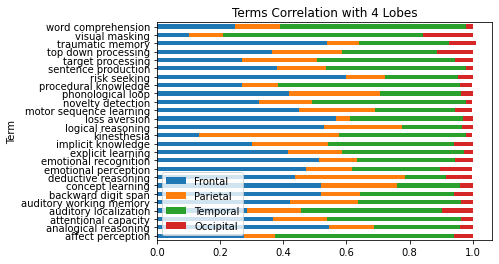

In [ ]:
# create data
df = pd.DataFrame([['affect perception', 0.275, 0.098, 0.569, 0.059], ['analogical reasoning', 0.545, 0.143, 0.273, 0.039], ['attentional capacity', 0.366, 0.171, 0.427, 0.037],
                   ['auditory localization', 0.284, 0.173, 0.444, 0.099], ['auditory working memory', 0.421, 0.215, 0.327, 0.037], ['backward digit span', 0.519, 0.125, 0.298, 0.058],
                   ['concept learning', 0.52, 0.24, 0.2, 0.04], ['deductive reasoning', 0.436, 0.35, 0.128, 0.085], ['emotional perception', 0.471, 0.146, 0.28, 0.102], 
                   ['emotional recognition', 0.514, 0.119, 0.312, 0.055], ['explicit learning', 0.415, 0.17, 0.387, 0.028], ['implicit knowledge', 0.3, 0.24, 0.4, 0.06], 
                   ['kinesthesia', 0.133, 0.444, 0.4, 0.022], ['logical reasoning', 0.528, 0.247, 0.191, 0.034], ['loss aversion', 0.567, 0.045, 0.358, 0.03], ['motor sequence learning', 0.448, 0.241, 0.256, 0.054],
                   ['novelty detection', 0.322, 0.169, 0.486, 0.022], ['phonological loop', 0.417, 0.288, 0.259, 0.036], ['procedural knowledge', 0.269, 0.115, 0.577, 0.038], 
                   ['risk seeking', 0.6, 0.123, 0.231, 0.046], ['sentence production', 0.381, 0.155, 0.443, 0.021], ['target processing', 0.268, 0.24, 0.436, 0.056],
                   ['top down processing', 0.364, 0.222, 0.301, 0.113], ['traumatic memory', 0.537, 0.104, 0.284, 0.085], ['visual masking', 0.101, 0.107, 0.633, 0.16],
                   ['word comprehension', 0.248, 0.14, 0.591, 0.021]],
                  columns=['Term', 'Frontal', 'Parietal', 'Temporal', 'Occipital'])
# view data
print(df)
  
# plot data in stack manner of bar type
df.plot(x='Term', kind='barh', stacked=True,
        title='Terms Correlation with 4 Lobes')

<BarContainer object of 4 artists>

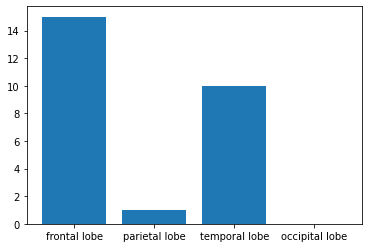

In [ ]:
y = [0, 0, 0, 0]
for term in valid_terms:
  ind = term_lobes_rel[term].index(max(term_lobes_rel[term]))
  y[ind] += 1
plt.bar([lobe.lower() for lobe in lobes], y)

Among the 26 terms, 15 terms have strongest correlation with the frontal lobe, 1 term with parietal lobe, 10 terms with temporal lobe, and 0 with occipital lobe.

## Term Clustering
Using NLP to cluster the terms based on their related article's abstracts. Using TF-IDF for word vectorization and K-Means for clustering.

### Small term-set clustering
Applying clustering on the 26 terms we previously used to analyse term-lobe relations.

In [ ]:
# extract abstract of the articles of the 26 terms
term_text = []
for term in valid_terms:
  results, meta_data = collect_words([[term]], field='tiab', retmax=500)
  text = ' '.join(results[0].words)
  term_text.append([term, text])

In [ ]:
term_text_df = pd.DataFrame(term_text, columns=['term', 'text'])
term_text_df.head()

,term,text
0,affect perception,Collaborative interactions require social robo...
1,analogical reasoning,"Recently, interest has surged in similarity-ba..."
2,attentional capacity,The attentional capacity required of haptic mo...
3,auditory localization,What factors are important in the calibration ...
4,auditory working memory,Previous studies have found conflicting result...


In [ ]:
# store term_test_df as a csv file
# term_text_df.to_csv('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/term_text_small.csv', index=False)

In [ ]:
def text_clean(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return ' '.join([stemmer.lemmatize(word) for word in nopunc])

In [ ]:
term_text_df['text_clean'] = term_text_df['text'].apply(text_clean)
term_text_df.head()

,term,text,text_clean
0,affect perception,Collaborative interactions require social robo...,collaborative interaction require social robot...
1,analogical reasoning,"Recently, interest has surged in similarity-ba...",recently interest surged similaritybased epist...
2,attentional capacity,The attentional capacity required of haptic mo...,the attentional capacity required haptic modal...
3,auditory localization,What factors are important in the calibration ...,what factor important calibration mental repre...
4,auditory working memory,Previous studies have found conflicting result...,previous study found conflicting result indivi...


In [ ]:
# vectorize the text words
word_vectorizer = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 3), stop_words = stopwords.words('english'))
X = word_vectorizer.fit_transform(term_text_df['text_clean'])

In [ ]:
# find optimal k 
ssd = [] # sum of squared distances
for k in range(1, 27, 2): 
  km = KMeans(n_clusters=k).fit(X)
  ssd.append(km.inertia_)

elbow point: 11


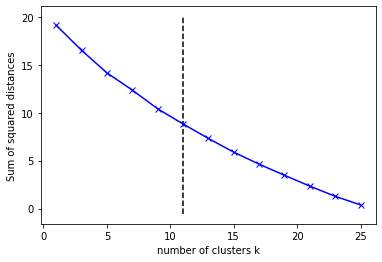

In [ ]:
# find elbow point
kn = KneeLocator(range(1, 27, 2), ssd, curve='convex', direction='decreasing')
k_opt = kn.knee
print('elbow point:', k_opt)

# plot sum of squared distance curve and elbow point
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1, 27, 2), ssd, 'bx-')
plt.vlines(k_opt, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
# find the clusters by optimal k
clusters = KMeans(n_clusters=11).fit(X)

#### Results
The results are shwon in a dictionary, in which key is cluster and value is list of terms in the cluster.

In [ ]:
term_clusters = {}
for i in range(11):
  terms = list(term_text_df[clusters.labels_==i].iloc[:,0])
  term_clusters[i] = terms
for cluster, term in term_clusters.items():
  print(cluster, term)

0 ['concept learning', 'explicit learning', 'motor sequence learning']
1 ['auditory working memory', 'backward digit span', 'phonological loop']
2 ['loss aversion', 'risk seeking']
3 ['attentional capacity', 'novelty detection', 'target processing', 'top down processing', 'visual masking']
4 ['analogical reasoning', 'deductive reasoning', 'logical reasoning']
5 ['kinesthesia']
6 ['affect perception', 'emotional perception', 'emotional recognition']
7 ['traumatic memory']
8 ['implicit knowledge', 'procedural knowledge']
9 ['auditory localization']
10 ['sentence production', 'word comprehension']


It can be seen that the terms in each of these clusters are very similar in there correlations between the four lobes.

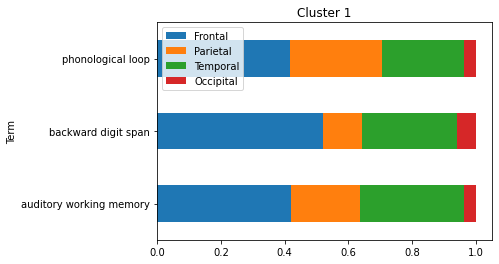

In [ ]:
dfc1 = df[df['Term'].str.contains('auditory working memory') | df['Term'].str.contains('backward digit span') | df['Term'].str.contains('phonological loop') ]
dfc1.plot(x='Term', kind='barh', stacked=True,
        title='Cluster 1')

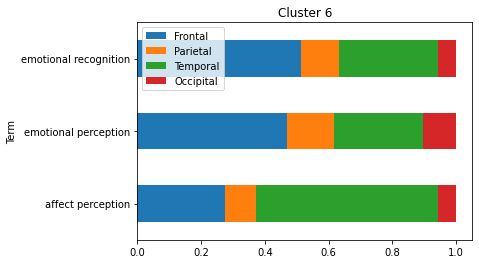

In [ ]:
dfc6 = df[df['Term'].str.contains('affect perception') | df['Term'].str.contains('emotional perception') | df['Term'].str.contains('emotional recognition') ]
dfc6.plot(x='Term', kind='barh', stacked=True,
        title='Cluster 6')

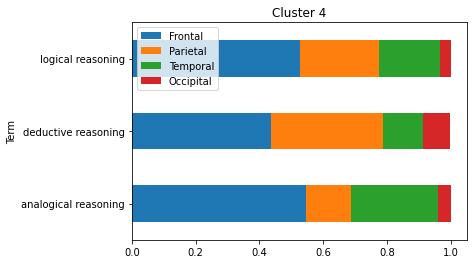

In [ ]:
dfc4 = df[df['Term'].str.contains('analogical reasoning') | df['Term'].str.contains('deductive reasoning') | df['Term'].str.contains('logical reasoning') ]
dfc4.plot(x='Term', kind='barh', stacked=True,
        title='Cluster 4')

### Larger term-set clustering

#### Extract larger term-set
Extract valid terms that have 100 related articles so that there will be enough information for analysing

In [ ]:
# find all terms that has 100+ related articles
# cluster_terms = []
# for term in all_terms:
#   results, meta_data = collect_words([term], field='tiab', verbose=False)
#   if len(results[0]) >= 100:
#     cluster_terms.append(term)
# print(len(cluster_terms))

In [ ]:
# save the terms into terms.txt
# with open('/content/drive/MyDrive/datasets/cluster_terms.txt', 'w') as f:
#   for term in cluster_terms:
#     f.write(term[0])
#     f.write('\n')

In [ ]:
# read all the cluster terms into a list
fterms = open('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/cluster_terms.txt', 'r')
cluster_terms = fterms.read().split('\n')
fterms.close()
cluster_terms = cluster_terms[0:len(cluster_terms)-1]
unique = []
[unique.append(term) for term in cluster_terms if term not in unique]
cluster_terms = unique
len(cluster_terms)

276

In [ ]:
# extract text for each term
term_text2 = []
inds = random.sample(range(0, 276), 100) # draw 100 random terms
for i in inds:
  term = cluster_terms[i]
  results, meta_data = collect_words([[term]], field='tiab')
  text = ' '.join(results[0].words)
  term_text2.append([term, text])

In [ ]:
# save gathered data to csv file
# term_text_df2[['term', 'text']].to_csv('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/term_text_large.csv', index=False)

In [ ]:
# clean text
# term_text_df2 = pd.DataFrame(term_text2, columns=['term', 'text'])
term_text_df2 = pd.read_csv('/content/drive/MyDrive/datasets/cogs138-function-lobe-relation/term_text_large.csv')
term_text_df2['text_clean'] = term_text_df2['text'].apply(text_clean)
term_text_df2.head()

,term,text,text_clean
0,anger,Family mealtimes can be important for supporti...,family mealtime important supporting childrens...
1,task switching,"The P3 component (P300, P3b) is considered to ...",the p component p pb considered effective inde...
2,reconsolidation,"Spaced training, which involves long inter-tri...",spaced training involves long intertrial inter...
3,context memory,Lateral entorhinal cortex (LEC) has been hypot...,lateral entorhinal cortex lec hypothesized pro...
4,handedness,ConspectusMechanically interlocked molecules s...,conspectusmechanically interlocked molecule ro...


In [ ]:
# vectorize text 
word_vectorizer = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 3), stop_words = stopwords.words('english'))
X2 = word_vectorizer.fit_transform(term_text_df2['text_clean'])
ssd2 = [] # sum of squared distance
for k in range(1, 101, 5): # find optimal k
  km = KMeans(n_clusters=k).fit(X2)
  ssd2.append(km.inertia_)

elbow point: 46


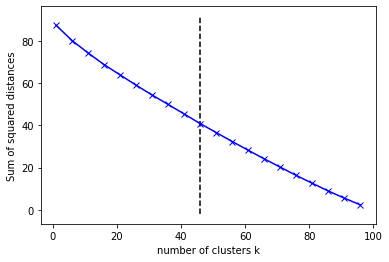

In [ ]:
kn2 = KneeLocator(range(1, 101, 5), ssd2, curve='convex', direction='decreasing')
k_opt2 = kn2.knee
print('elbow point:', k_opt2)
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1, 101, 5), ssd2, 'bx-')
plt.vlines(k_opt2, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

#### Results
The results are shwon in a dictionary, in which key is cluster and value is list of terms in the cluster.

In [ ]:
clusters2 = KMeans(n_clusters=46).fit(X2)
term_clusters2 = {}
for i in range(k_opt2):
  terms = list(term_text_df2[clusters2.labels_==i].iloc[:,0])
  term_clusters2[i] = terms
for cluster, term in term_clusters2.items():
  print(cluster, term)

0 ['timbre']
1 ['digit span', 'simple reaction time', 'Stroop']
2 ['false memory']
3 ['backward masking', 'subliminal perception']
4 ['memory', 'plasticity']
5 ['anger', 'emotional recognition', 'facial expression']
6 ['sentence comprehension', 'phonological awareness']
7 ['fluid intelligence', 'executive function', 'executive control', 'Wisconsin card sorting']
8 ['reconsolidation', 'context memory', 'source memory', 'motor memory', 'memory trace', 'forgetting']
9 ['color discrimination', 'color perception']
10 ['mirror neuron', 'performance monitoring', 'action monitoring']
11 ['eyeblink conditioning', 'classical conditioning']
12 ['novelty processing', 'involuntary attention', 'perceptual learning', 'oddball', 'perceptual categorization', 'passive listening']
13 ['fear', 'contextual knowledge', 'awareness']
14 ['object identification', 'object perception']
15 ['morphological processing', 'lexical retrieval', 'speech processing', 'semantic processing', 'lexical processing']
16 ['task

### Clustering Results
From the analysis we conduct above, we apply clustering analysis twice. For the first time, we apply clustering analysis on the 26 terms that have 300+ related articles. The number of clusters is 11, which is the elbow point we acquire. After getting the results of the clusters, we compare it to the results of the term-lobe correlation. 
<br/> For the second time, we apply clustering analysis on the 100 terms that have 100+ related articles. The number of clusters is 46, which is the elbow point we acquire. We also compare the results of the clustering to the result of the term-lobe correlation.

# Conclusion & Discussion

**Discussion of results**
<br/>Throughout the entire project, we mainly conducted two analyses. The first was the term-lobes relation analysis involving the 26 terms that all have 300+ related articles, which assesses the ratio of the four lobes’ responsibilities for each brain function. From the result and visualization presented in the corresponding section, we can see the relationship between each brain function and four lobes, we observe that most of the terms have strong relationship with frontal and temporal lobes, which is consistent with the ground truth that this two lobes participate in a lot of major brain functions.  Based on this result, we conducted a second analysis, which is the term clustering. By finding the appropriate elbow point, we had 11 clusters for these 26 terms using K-means. After comparing the results from both analyses, we found that terms representing similar functions are correctly clustered together. Combining this with the result of previous term-lobe analysis, we found that the ratio of lobe responsibilities for terms from each cluster are similar. So it is reasonable to conclude that the brain functions that have similar relationships with lobes of the brain are interconnected. After finishing the analysis of the small term-set, we are curious how the clustering works on more terms but less articles from each term. For the larger term-set, we extracted 100 valid terms that have 100 related articles and did  similar clustering analysis for it. As a result, similarity terms represent similar functions that are clustered together.




**Limitations**
<br/>While we were doing the final project, we recognized three main limitations. The first limitation is from the LISC package we used to collect articles, which is used as data in our project. We used the function collect_words from the LISC package, and this function collects text data from EUtils using the specified search term. Within the function, there is a parameter called RETMAX, which determines the maximum amount of articles collected. At the beginning, we set it to 100, and we got ideal results. However, as we increased it to 500 for some terms, its output is 0, which really confused us. As a result, we chose 100 and 500 correspondingly for different steps. Second, as mentioned, the maximum number of articles related to each term collected is set to be 500. To run 500 articles, it took the computer more than 1 hour to process. It seems impossible for us to scan through the entire database of Pubmed, as the number of articles on Pubmed is in the millions. 500 is decent enough, but more articles processed would definitely make the result more accurate. Third, as we used the LISC package, the Article object returned by collect_words can only give us title and abstract of the articles instead of the entire text, so we only have the abstract of the articles for NLP and clustering.

**Potential Future Works**
<br/>In the future, first, we would like to increase the amount of articles collected from 500 to a larger number, which might exponentially increase the amount of time computer processing it, but it would make the results more accurate. Second, we would try to figure out how to extract the entire context of articles, rather than just the titles and abstracts. And this might involve the development of a new method. Third, for this project, we are only interested in the terms of function. In the future, we may analyze the terms of the other features from the list of 1299 terms, such as neurochemical and pathology.